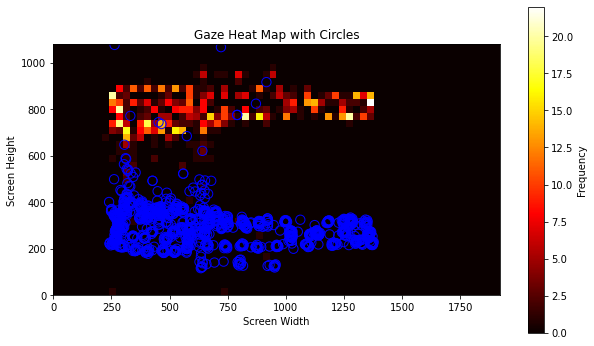

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Read the CSV data into a DataFrame
df = pd.read_csv('my_gaze_data4.csv')

# Combine left and right gaze points
df['x'] = df[['left_x', 'right_x']].mean(axis=1)
df['y'] = df[['left_y', 'right_y']].mean(axis=1)

# Drop rows with NaN values
df = df.dropna(subset=['x', 'y'])

# Normalize the coordinates to a specific screen resolution (e.g., 1920x1080)
screen_width = 1920
screen_height = 1080
df['x'] = df['x'] * screen_width
df['y'] = df['y'] * screen_height

# Create a heat map
heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=(64, 36), range=[[0, screen_width], [0, screen_height]])
heatmap = np.rot90(heatmap)
heatmap = np.flipud(heatmap)

# Plot heatmap using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='hot', interpolation='nearest', extent=[0, screen_width, 0, screen_height])
plt.colorbar(label='Frequency')

# Add circles for each gaze point
ax = plt.gca()
for idx, row in df.iterrows():
    circ = Circle((row['x'], row['y']), radius=20, color='blue', fill=False, linewidth=1)
    ax.add_patch(circ)

plt.title('Gaze Heat Map with Circles')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()
    

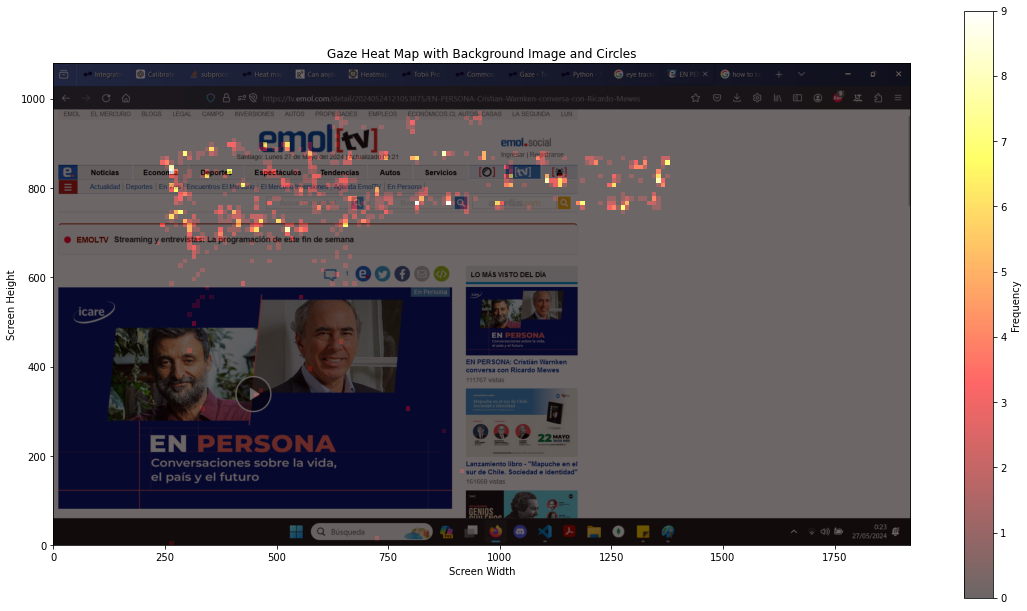

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image

# Read the CSV data into a DataFrame
df = pd.read_csv('my_gaze_data4.csv')

# Combine left and right gaze points
df['x'] = df[['left_x', 'right_x']].mean(axis=1)
df['y'] = df[['left_y', 'right_y']].mean(axis=1)

# Drop rows with NaN values
df = df.dropna(subset=['x', 'y'])

# Normalize the coordinates to a specific screen resolution (e.g., 1920x1080)
screen_width = 1920
screen_height = 1080
df['x'] = df['x'] * screen_width
df['y'] = df['y'] * screen_height

# Create a heat map
heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=(192, 108), range=[[0, screen_width], [0, screen_height]])
heatmap = np.rot90(heatmap)
heatmap = np.flipud(heatmap)

# Load the background image
background_image = Image.open('image.png')  # Make sure this image is the same resolution as the screen
background_image = background_image.resize((screen_width, screen_height))
background_image = np.array(background_image)

# Plot heatmap using matplotlib
plt.figure(figsize=(screen_width / 100, screen_height / 100))
plt.imshow(background_image, extent=[0, screen_width, 0, screen_height])
plt.imshow(heatmap, cmap='hot', interpolation='nearest', alpha=0.6, extent=[0, screen_width, 0, screen_height])
plt.colorbar(label='Frequency')


plt.title('Gaze Heat Map with Background Image and Circles')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()


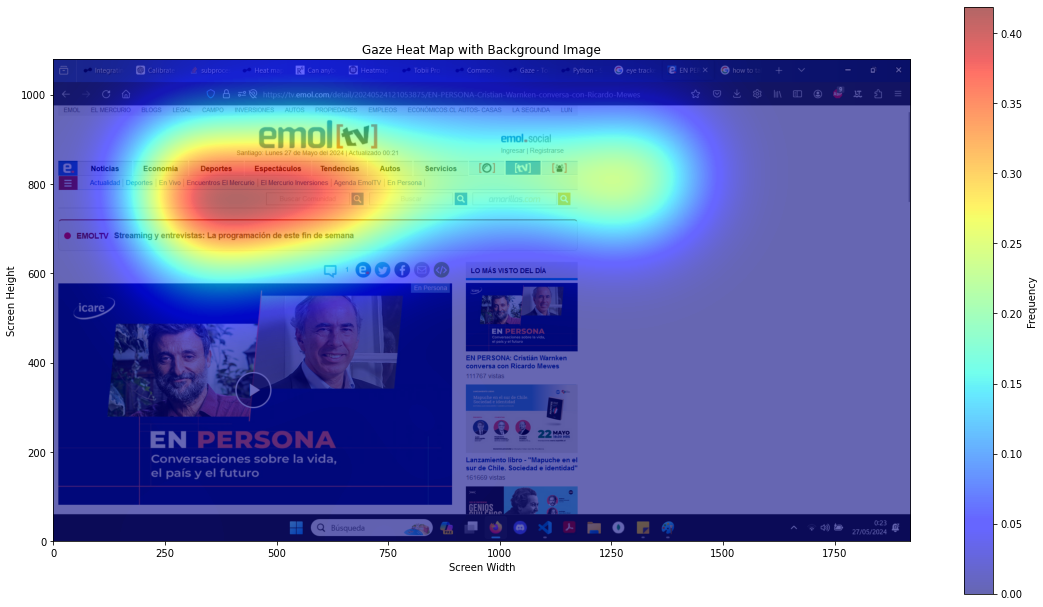

In [52]:

from scipy.ndimage.filters import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=10)

# Load the background image
background_image = Image.open('image.png')  # Make sure this image is the same resolution as the screen
background_image = background_image.resize((screen_width, screen_height))
background_image = np.array(background_image)

# Plot heatmap using matplotlib
plt.figure(figsize=(screen_width / 100, screen_height / 100))
plt.imshow(background_image, extent=[0, screen_width, 0, screen_height])
plt.imshow(heatmap, cmap='jet', interpolation='bilinear', alpha=0.6, extent=[0, screen_width, 0, screen_height])
plt.colorbar(label='Frequency')

plt.title('Gaze Heat Map with Background Image')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

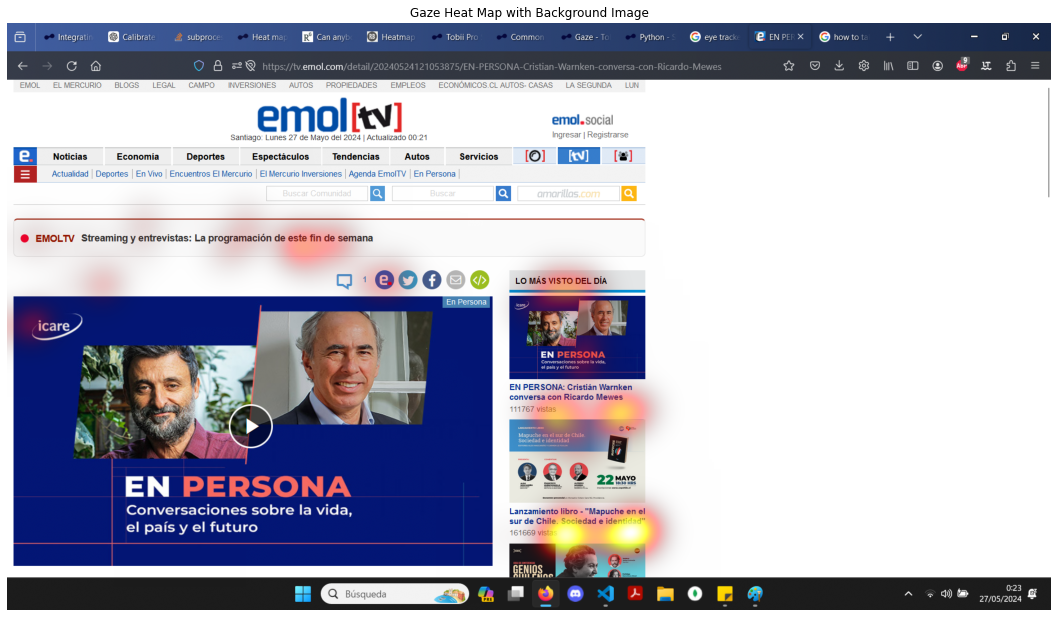

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors

# Read the CSV data into a DataFrame
df = pd.read_csv('my_gaze_data4.csv')

# Combine left and right gaze points
df['x'] = df[['left_x', 'right_x']].mean(axis=1)
df['y'] = df[['left_y', 'right_y']].mean(axis=1)

# Drop rows with NaN values
df = df.dropna(subset=['x', 'y'])

# Normalize the coordinates to a specific screen resolution (e.g., 1920x1080)
screen_width = 1920
screen_height = 1080
df['x'] = (df['x'] * screen_width).astype(int)
df['y'] = (df['y'] * screen_height).astype(int)

# Create a heat map with higher resolution
heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=(screen_width, screen_height), range=[[0, screen_width], [0, screen_height]])
heatmap = np.rot90(heatmap)
heatmap = np.flipud(heatmap)

# Adjust the size of the heatmap zone with Gaussian filter
sigma = 30  # You can change this value to make the heat zones larger or smaller
heatmap = gaussian_filter(heatmap, sigma=sigma)

# Normalize the heatmap to be in the range [0, 1]
heatmap = heatmap / np.max(heatmap)

# Load the background image
background_image = Image.open('image.png')  # Make sure this image is the same resolution as the screen
background_image = background_image.resize((screen_width, screen_height))
background_image = np.array(background_image)

# Create a colored heatmap image
heatmap_colored = np.zeros((screen_height, screen_width, 4))
cmap = plt.get_cmap('hot')

for i in range(screen_height):
    for j in range(screen_width):
        if heatmap[i, j] > 0:
            color = cmap(heatmap[i, j])
            heatmap_colored[i, j, :3] = color[:3]
            heatmap_colored[i, j, 3] = heatmap[i, j]

# Blend the heatmap with the background image
combined_image = background_image.astype(float) / 255
combined_image = combined_image * (1 - heatmap_colored[:, :, 3:]) + heatmap_colored[:, :, :3] * heatmap_colored[:, :, 3:]

# Plot the final image
plt.figure(figsize=(screen_width / 100, screen_height / 100))
plt.imshow(combined_image)
plt.axis('off')
plt.title('Gaze Heat Map with Background Image')
plt.show()


In [55]:
df[['x','y']].to_csv("definitivo.csv", index=False, header=False)